# Short Assignment 1 Solutions

**In this assignment, you will be working with the "beer foam" dataset.**

* **The [beer foam dataset](http://www.stat.ufl.edu/~winner/datasets.html) was collected by A. Leike and published in their work titled "Demonstration of the Exponential Decay Law Using Beer Froth" in 2002.**

#### Data Set Description

**The data contains measurements of wet foam height and beer height at various time points for 3 brands of beer. The author of this data set fit an *exponential decay model* of the form $H(t) = H_0 e^{-\lambda t}$.**

**The data set is saved as a *.csv* file ("beer_foam.csv") with information about the foam height (in cm) from 3 brands of beer over 15 measurement times (in seconds) after the time of pour.**

**The file is organized in 4 columns:**
1. **Time from pour (in seconds)**
2. **Erdinger Weissbier foam height (in cm)**
3. **Augustinerbrau Munchen foam height (in cm)**
4. **Budweiser foam height (in cm)**

## Objective

**The goal of this assignment is to use and optimize a linear regression that effectively *predicts* the wet foam height from different brands of beer after time of pour, using available information about that beer's previous foam height level at different times.**

## Problem Set

**Answer the following questions:**

1. **Load the data using ```pandas```.**

2. **Build and train a polynomial regression model for each bear brand with model order $M=4$.**

3. **Build and train an exponential model for each bear brand.**

4. **Predict the foam height for each beer brand for $t=450~$seconds after pour using the trained polynomial regression model (from problem 2) and exponential model (from problem 3).**

5. **Compare and discuss the prediction results for $t=450~$seconds for both models.**

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('beer_foam.csv')
data

,Time,Erdinger,Augustinerbrau,Budweiser
0,0,17.0,14.0,14.0
1,15,16.1,11.8,12.1
2,30,14.9,10.5,10.9
3,45,14.0,9.3,10.0
4,60,13.2,8.5,9.3
5,75,12.5,7.7,8.6
6,90,11.9,7.1,8.0
7,105,11.2,6.5,7.5
8,120,10.7,6.0,7.0
9,150,9.7,5.3,6.2


In [3]:
time = data['Time'].to_numpy()

height = data[data.columns[1:]].to_numpy()

The next function implements polynomial regression and uses the coefficient of determination as the validation metric.

In [4]:
def PolynomialFit(x,t,M,name=None,display=True):
    # Train Set
    xtrain, ttrain = x[:12], t[:12]
    
    # Validation Set
    xval, tval = x[12:],t[12:]
    
    # Feature matrix for training
    X = np.array([xtrain**m for m in range(M)]).T
    # Coefficients
    w = la.pinv(X)@ttrain 
    #prediction for training
    ytrain = X@w

    # Feature matrix for validation
    Xval = np.array([xval**m for m in range(M)]).T
    #prediction for test
    yval = Xval@w
    
    # prediction for time = 450 seconds
    x450 = [450**m for m in range(M)]
    pred450 = x450@w
    
    # Metric of sucess: coefficient of determination (r^2)
    m, b, rtrain, _, _ = stats.linregress(ytrain, ttrain)
    _, _, rval, _, _ = stats.linregress(yval, tval)
    xvalues = np.linspace(np.min(ttrain), np.max(ttrain),100)
    
    if display:
        fig=plt.figure(figsize=(15,5))
        fig.add_subplot(1,2,1)
        plt.scatter(xtrain,ttrain, c='b',label='training data')
        plt.scatter(xval,tval, c='c',label='validation data')
        plt.plot(xtrain,ytrain,'-r', label='training model')
        plt.plot(xval,yval,'--g', label='validation prediction')
        plt.plot(450,pred450,'*r',label='prediction for t=450s')
        plt.xlabel('Time after pour, in seconds')
        plt.ylabel('Foam Height, in cm')
        plt.legend()
        if name:
            plt.title(name+': at t=450s, foam height= '+str(np.round(pred450,2))+' cm');

        fig.add_subplot(1,2,2)
        plt.scatter(np.sort(ttrain), np.sort(ytrain), c='b',label='quantiles for training')
        plt.plot(xvalues, xvalues*m+b, 'r',label='regression fit')
        plt.xlabel('True Target Values')
        plt.ylabel('Model Approximation')
        plt.legend()
        if name:
            plt.title(name + '\n Train $r^2 = $ '+str(np.round(rtrain**2,4))
                      + ', Validation $r^2 = $ '+str(np.round(rval**2,4)))
        
    print('PERFORMANCE')
    print('Polynomial Model')
    print('M =',M)
    print('-------------------------------')
    print('TRAINING SET')
    print('N =', len(xtrain))
    print('r^2 =', rtrain**2,4)
    print('MSE = ', np.mean((ttrain-ytrain)**2),'\n')
    print('VALIDATION SET')
    print('N =', len(xval))
    print('r^2 =', rval**2,4)
    print('MSE = ', np.mean((tval-yval)**2),'\n')
    print('PREDICTION FOR t = 450 s')
    print('Foam height: ',pred450, ' cm')
    print('-------------------------------')

PERFORMANCE
Polynomial Model
M = 4
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9995095610815934 4
MSE =  0.003483206184949714 

VALIDATION SET
N = 3
r^2 = 0.9921806032175773 4
MSE =  0.03355133926465662 

PREDICTION FOR t = 450 s
Foam height:  1.5382047283120173  cm
-------------------------------


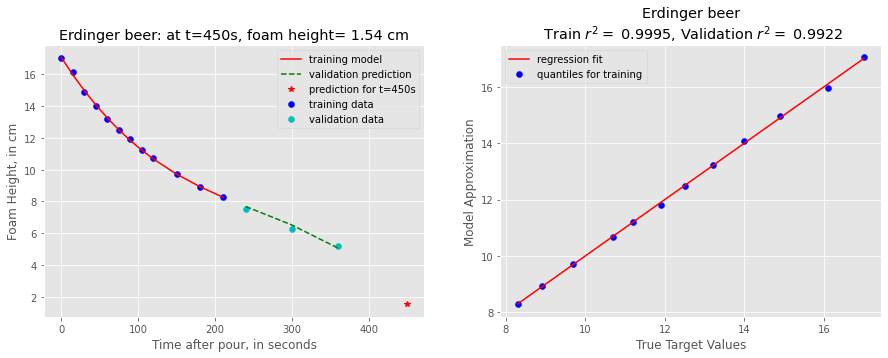

In [5]:
PolynomialFit(time, height[:,0],4,'Erdinger beer')

PERFORMANCE
Polynomial Model
M = 4
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9983658335752092 4
MSE =  0.01445102448144577 

VALIDATION SET
N = 3
r^2 = 0.8237994893957121 4
MSE =  107.2651012854215 

PREDICTION FOR t = 450 s
Foam height:  -48.98218996900374  cm
-------------------------------


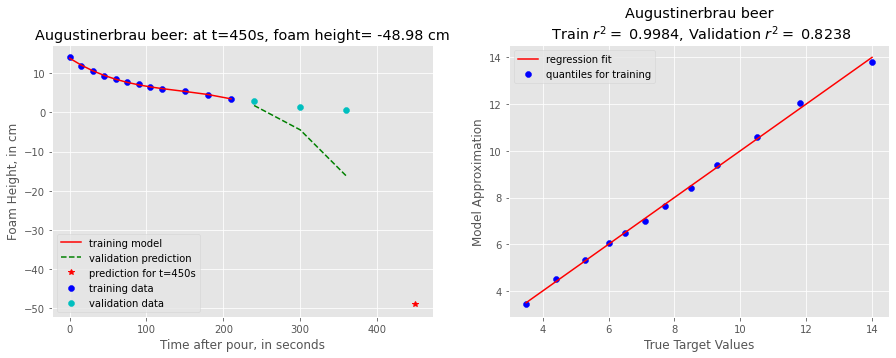

In [6]:
PolynomialFit(time, height[:,1],4,'Augustinerbrau beer')

PERFORMANCE
Polynomial Model
M = 4
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9980048015220165 4
MSE =  0.014206921606843175 

VALIDATION SET
N = 3
r^2 = 0.9347343472397259 4
MSE =  70.72455059248502 

PREDICTION FOR t = 450 s
Foam height:  -40.892904978095096  cm
-------------------------------


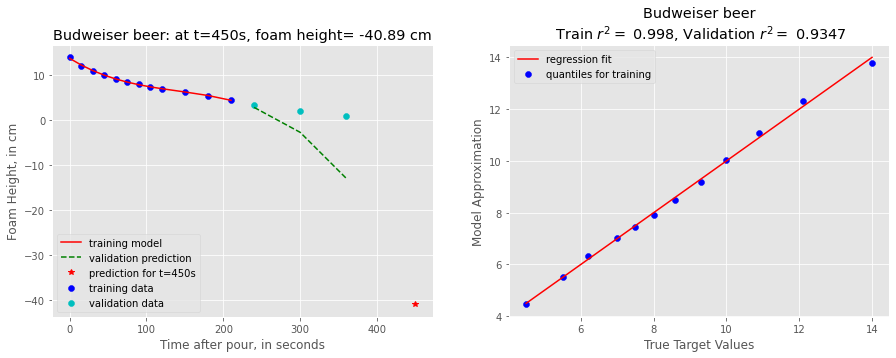

In [7]:
PolynomialFit(time, height[:,2],4,'Budweiser beer')

The next function implements exponential model and uses the coefficient of determination as the validation metric.

In [8]:
def ExponentialFit(x,t,M,name=None,display=True):
    # Train Set
    xtrain, ttrain = x[:12], t[:12]
    ttrain_log=np.log(ttrain)
    
    # Validation Set
    xval, tval = x[12:],t[12:]
    
    # Feature matrix for training
    X = np.array([xtrain**m for m in range(M)]).T
    # Coefficients
    w = la.pinv(X)@ttrain_log
    #prediction for training
    ytrain = np.exp(X@w)

    # Feature matrix for validation
    Xval = np.array([xval**m for m in range(M)]).T
    #prediction for test
    yval = np.exp(Xval@w)
    
    # prediction for time = 450 seconds
    x450 = [450**m for m in range(M)]
    pred450 = np.exp(x450@w)
    
    # Metric of sucess: coefficient of determination (r^2)
    m, b, rtrain, _, _ = stats.linregress(ytrain, ttrain)
    _, _, rval, _, _ = stats.linregress(yval, tval)
    xvalues = np.linspace(np.min(ttrain), np.max(ttrain),100)
    
    if display:
        fig=plt.figure(figsize=(15,5))
        fig.add_subplot(1,2,1)
        plt.scatter(xtrain,ttrain, c='b',label='training data')
        plt.scatter(xval,tval, c='c',label='validation data')
        plt.plot(xtrain,ytrain,'-r', label='training model')
        plt.plot(xval,yval,'--g', label='validation prediction')
        plt.plot(450,pred450,'*r',label='prediction for t=450s')
        plt.xlabel('Time after pour, in seconds')
        plt.ylabel('Foam Height, in cm')
        plt.legend()
        if name:
            plt.title(name+': at t=450s, foam height= '+str(np.round(pred450,2))+' cm');

        fig.add_subplot(1,2,2)
        plt.scatter(np.sort(ttrain), np.sort(ytrain), c='b',label='quantiles for training')
        plt.plot(xvalues, xvalues*m+b, 'r',label='regression fit')
        plt.xlabel('True Target Values')
        plt.ylabel('Model Approximation')
        plt.legend()
        if name:
            plt.title(name + '\n Train $r^2 = $ '+str(np.round(rtrain**2,4))
                      + ', Validation $r^2 = $ '+str(np.round(rval**2,4)))
        
    print('PERFORMANCE')
    print('Polynomial Model')
    print('M =',M)
    print('-------------------------------')
    print('TRAINING SET')
    print('N =', len(xtrain))
    print('r^2 =', rtrain**2)
    print('MSE = ', np.mean((ttrain-ytrain)**2),'\n')
    print('VALIDATION SET')
    print('N =', len(xval))
    print('r^2 =', rval**2)
    print('MSE = ', np.mean((tval-yval)**2),'\n')
    print('PREDICTION FOR t = 450 s')
    print('Foam height: ',pred450, ' cm')
    print('-------------------------------')

PERFORMANCE
Polynomial Model
M = 2
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9912636358135656
MSE =  0.06791922889883455 

VALIDATION SET
N = 3
r^2 = 0.9988039819110719
MSE =  0.17476035474137155 

PREDICTION FOR t = 450 s
Foam height:  3.4721600835417092  cm
-------------------------------


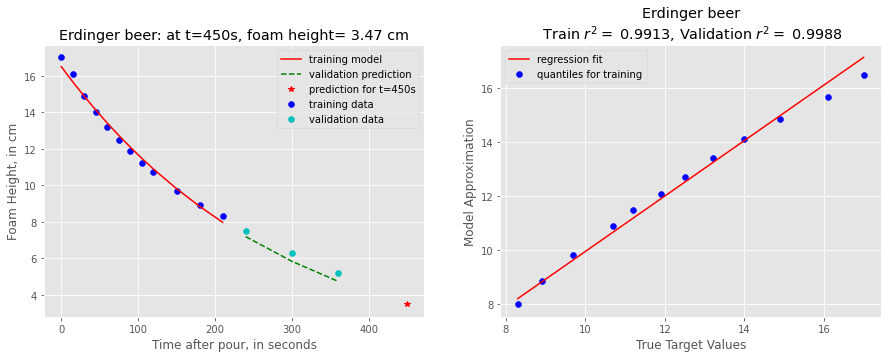

In [9]:
ExponentialFit(time, height[:,0],2,'Erdinger beer')

PERFORMANCE
Polynomial Model
M = 2
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9820537615724897
MSE =  0.1790631433832386 

VALIDATION SET
N = 3
r^2 = 0.9771573450737471
MSE =  0.32969727633036267 

PREDICTION FOR t = 450 s
Foam height:  0.8006371356057405  cm
-------------------------------


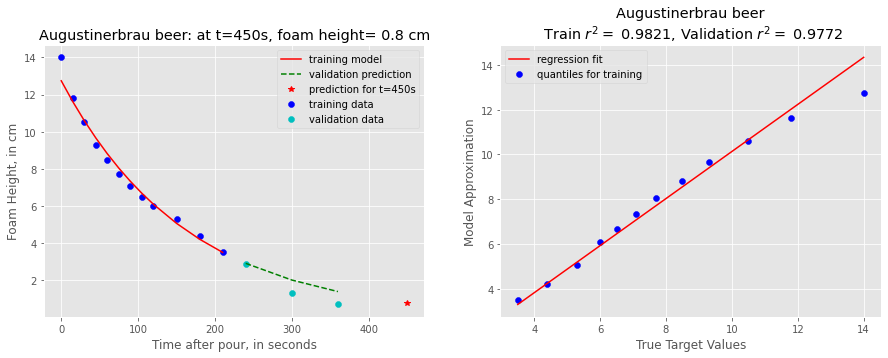

In [10]:
ExponentialFit(time, height[:,1],2,'Augustinerbrau beer')

PERFORMANCE
Polynomial Model
M = 2
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9822085271331696
MSE =  0.1372856788526843 

VALIDATION SET
N = 3
r^2 = 0.9999921861715146
MSE =  0.8073492822525493 

PREDICTION FOR t = 450 s
Foam height:  1.357402031400266  cm
-------------------------------


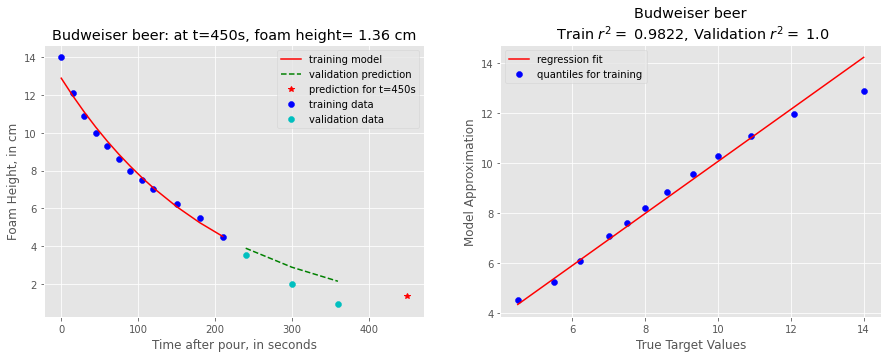

In [11]:
ExponentialFit(time, height[:,2],2,'Budweiser beer')

**Observations:**

1. The polynomial regression predicted a negative foam height for $t=450$ seconds, as it does not encode any physical meaning about the *true* beer foam height model. On the other hand, the exponential model is best suited to encode this type of model, returning reasonably valued predictions for $t=450$seconds.

2. For all three types of beer:
    * Even though the coefficient of determination ($r^2$) is slightly larger in the training data for the polynomial model, we see that for the samples reserved for the validation set (last 3 samples), the $r^2$ is much larger for the exponential model. This indicates that the exponential model has a better **generalization** ability.
    * We can also see that the Mean Squared Error (MSE) for the validation samples is much smaller for the exponential model then for the polynomial model, once more supporting the generalization ability claim.
    
3. Overall, the exponential model outperfoms the polynomial model because it produces better summary statistics for the validation set suggesting good generalization, and it encodes physical properties about the data, such as height is a value greater or equal than 0.

4. Note that if we were to compare the models using the data the model was trained with, we will be biasing our selection based on the model that overfitted the most. In subsequent assignments, we should always employ the best practices of experimental design.